In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

In [2]:
credit_df = pd.read_csv("German Credit Dataset.csv")

In [3]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

## all the 17 columns have 1000 non-null entries 
## Some columns are identified as object datatype and some columns are defined as integer datatype.
## The issue one here is while building the decision tree or a cart model in python this is to ensure that we have to ensure that there are no object data_type there are only integer data_type for both dependent and independent variable 
## Here my objective now is to convert all columns of object datatype to integer datatype


In [5]:
for feature in credit_df.columns:
    if credit_df[feature].dtype == "object":
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [7]:
X = credit_df.drop("default", axis = 1)  # Independent Variables in X

Y = credit_df.pop("default")   #Dependent variable in y

## random state = 1 just to ensure uniformity across the system

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [10]:
dt_model = DecisionTreeClassifier(criterion="gini")

In [11]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [12]:
from sklearn import tree

In [13]:
train_char_label = ["No", "Yes"]

In [14]:
Credit_Tree_File = open("d:\credit_tree.dot", "w")

In [15]:
dot_data = tree.export_graphviz(dt_model, out_file = Credit_Tree_File, feature_names = list(X_train), class_names = train_char_label)

In [16]:
Credit_Tree_File.close()

## let us go ahead and re-build this decision tree using some prunning methods

In [17]:
reg_dt_model = DecisionTreeClassifier(criterion = "gini", max_depth = 7, min_samples_leaf = 10, min_samples_split = 30)

# min_samples_leaf = x , min_samples_split = 3x (not a fixed one but better to do so)

In [18]:
reg_dt_model.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [19]:
credit_tree_regularized = open("d:/credit_tree_regularized.dot", "w")

dot_data = tree.export_graphviz(reg_dt_model, out_file = credit_tree_regularized, feature_names = list(X_train), class_names = train_char_label)
credit_tree_regularized.close()

In [20]:
reg_dt_model.feature_importances_

array([0.39825712, 0.14608975, 0.09986185, 0.06438364, 0.09635413,
       0.07521616, 0.03116225, 0.02941814, 0.        , 0.00909944,
       0.02221617, 0.        , 0.01221686, 0.01572449, 0.        ,
       0.        ])

In [21]:
print( pd.DataFrame ( dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns ) )

                           Imp
checking_balance      0.139521
months_loan_duration  0.089799
credit_history        0.064375
purpose               0.062547
amount                0.172271
savings_balance       0.066823
employment_duration   0.072238
percent_of_income     0.032868
years_at_residence    0.044942
age                   0.145829
other_credit          0.022302
housing               0.016386
existing_loans_count  0.017788
job                   0.023460
dependents            0.013349
phone                 0.015504


In [22]:
ytrain_predict1 = reg_dt_model.predict(X_train)

ytest_predict1 = reg_dt_model.predict(X_test)

In [23]:
ytrain_predict2 = reg_dt_model.predict_proba(X_train)

ytest_predict2 = reg_dt_model.predict_proba(X_test)

In [24]:
ytrain_predict1

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [25]:
ytrain_predict2

array([[0.24137931, 0.75862069],
       [1.        , 0.        ],
       [0.43478261, 0.56521739],
       ...,
       [0.82142857, 0.17857143],
       [0.24137931, 0.75862069],
       [0.8125    , 0.1875    ]])

## CART - Model Performance Measure_Hands-On

In [26]:
import matplotlib.pyplot as plt

In [27]:
probs = reg_dt_model.predict_proba(X_train)

In [28]:
probs = probs[:,1]

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
auc_dev = roc_auc_score(Y_train, probs)

In [31]:
auc_dev

0.8510586131302642

In [32]:
# probs = reg_dt_model.predict_proba(X_test)

In [33]:
# probs = probs[:,1]

In [34]:
# auc_test = roc_auc_score(Y_test, probs)

In [35]:
# auc_test

# 0.724788089545751

In [36]:
from sklearn.metrics import roc_curve

In [37]:
fpr, tpr, thresholds = roc_curve(Y_train, probs)

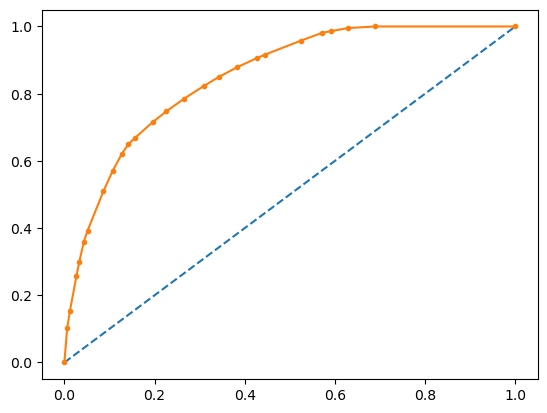

In [38]:
plt.plot([0, 1], [0,1], linestyle = "--")
# plot the roc curve for the model
plt.plot(fpr, tpr, marker = ".")
# show the plot
plt.show()

## Area under the orange curve is larger

In [39]:
probs = reg_dt_model.predict_proba(X_test)

In [40]:
probs = probs[:, 1]

In [41]:
auc_test = roc_auc_score(Y_test, probs)

In [42]:
auc_test

0.724788089545751

In [43]:
fpr, tpr, threshold = roc_curve(Y_test, probs)

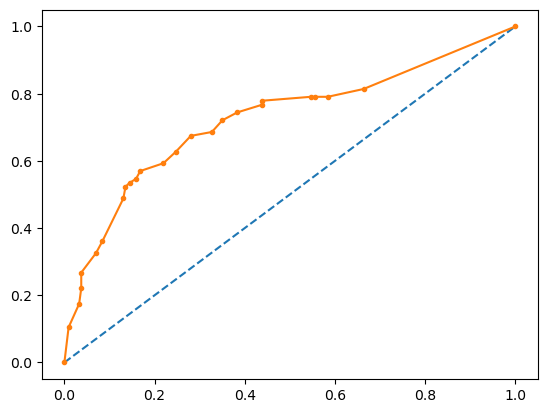

In [44]:
plt.plot([0, 1], [0, 1], linestyle = "--")
# plot the roc curve for the model
plt.plot(fpr, tpr, marker = ".")
# show the plot
plt.show()

## Area under the orange curve is Smaller

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
classification_report(Y_train, ytrain_predict1)

'              precision    recall  f1-score   support\n\n           0       0.84      0.87      0.86       486\n           1       0.68      0.62      0.65       214\n\n    accuracy                           0.80       700\n   macro avg       0.76      0.75      0.75       700\nweighted avg       0.79      0.80      0.79       700\n'

In [48]:
print(classification_report(Y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       486
           1       0.68      0.62      0.65       214

    accuracy                           0.80       700
   macro avg       0.76      0.75      0.75       700
weighted avg       0.79      0.80      0.79       700



In [49]:
print(classification_report(Y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [50]:
confusion_matrix (Y_train, ytrain_predict1)

array([[424,  62],
       [ 81, 133]], dtype=int64)

In [52]:
confusion_matrix(Y_test, ytest_predict1)

array([[183,  31],
       [ 40,  46]], dtype=int64)

In [53]:
reg_dt_model.score(X_train, Y_train)

0.7957142857142857

In [54]:
reg_dt_model.score(X_test, Y_test)

0.7633333333333333